# A web scraping demonstration using Python

In [1]:
# a list stores a collection of objects
x = ["one", "two"]
print(x)

['one', 'two']


In [2]:
# the append function adds an object to the list
x.append("three")
print(x)

['one', 'two', 'three']


In [3]:
# the 'split' function is used to split strings into a list of smaller components
sentence = "Hello, how are you?"
words = sentence.split(" ")
print(words)

['Hello,', 'how', 'are', 'you?']


In [4]:
# a 'for loop' is used to iterate over each item in a collection 
num = 1
for w in words :
    print("word #", num, ":", w)
    num = num + 1

word # 1 : Hello,
word # 2 : how
word # 3 : are
word # 4 : you?


In [5]:
# We 'scrape' a web page by downloading the underlying the html file, and parsing its contents
# We will scrape information from Weather.com

from bs4 import BeautifulSoup
import requests

# get the page
url = "https://weather.com/weather/tenday/l/06226:4:US"
page = requests.get(url)

# parse the page
soup = BeautifulSoup(page.content, 'html.parser')

# find and display the table
table = soup.find("table")
print(table.prettify())


<table class="twc-table" classname="twc-table">
 <thead>
  <tr>
   <th class=" twc-sticky-col" classname=" twc-sticky-col" id="day">
    Day
    <div class="twc-table-shadow sticky" classname="twc-table-shadow sticky">
    </div>
   </th>
   <th class="description undefined" classname="description undefined" id="description">
    Description
   </th>
   <th class="temp undefined" classname="temp undefined" id="hi-lo">
    High / Low
   </th>
   <th class="precip undefined" classname="precip undefined" id="precip">
    Precip
   </th>
   <th class="wind undefined" classname="wind undefined" id="wind">
    Wind
   </th>
   <th class="humidity undefined" classname="humidity undefined" id="humidity">
    Humidity
   </th>
  </tr>
 </thead>
 <tbody>
  <tr class="clickable closed" classname="clickable closed">
   <td class="twc-sticky-col cell-hide">
    <div class="twc-table-shadow sticky" classname="twc-table-shadow sticky">
    </div>
   </td>
   <td class="twc-sticky-col" classname="twc-

In [6]:
# look at the text of the second row, note that the high/low temp column has a class named 'temp'
rows = table.find_all("tr")
columns = rows[1].find_all("td")
for c in columns :
    print(c)
    print()


<td class="twc-sticky-col cell-hide"><div class="twc-table-shadow sticky" classname="twc-table-shadow sticky"></div></td>

<td class="twc-sticky-col" classname="twc-sticky-col" headers="day" title="Generally cloudy. High 47F. Winds NNW at 10 to 15 mph."><div><div><span class="date-time">Today</span><icon class="icon icon-svg icon-svg-light icon-cloudy icon-26" classname="icon icon-svg icon-svg-light icon-cloudy icon-26"><svg class="svg-cloudy" viewbox="0 0 200 200" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"><use class="svg-cloud" xlink:href="#svg-symbol-cloud"></use></svg></icon><div class="twc-table-shadow sticky" classname="twc-table-shadow sticky"></div></div><span class="day-detail clearfix">MAR 24</span></div></td>

<td class="description" classname="description" headers="description" title="Generally cloudy. High 47F. Winds NNW at 10 to 15 mph."><span>Cloudy</span></td>

<td class="temp" classname="temp" headers="hi-lo" title="Generally cloudy. 

In [7]:
hilow = table.find_all("td", {"class": "temp"})
hi_temps = []
for temps in hilow :
    t = temps.text.split("°")
    if len(t) != 3 :
        hi_temps.append(None)
    else :
        hi_temps.append(int(t[0]))
        
print(hi_temps)
    

[47, 41, 46, 53, 52, 58, 56, 49, 49, 52, 49, 53, 47, 47, 51]


In [8]:

descriptions = table.find_all("td", {"class": "description"})
colors = []
for d in descriptions :
    print(d.text)
    print()
    if "Sunny" in d.text :
        colors.append("orange")
    elif "Showers" in d.text :
        colors.append("blue")
    else :
        colors.append("gray")


Cloudy

AM Snow Showers

Sunny

Mostly Sunny

Cloudy

Cloudy

Showers

AM Showers

Mostly Sunny

AM Clouds/PM Sun

Showers

Showers

PM Showers

Partly Cloudy

Rain/Snow Showers



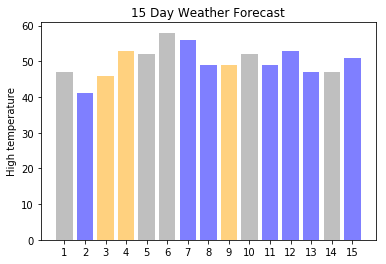

In [9]:
import numpy as np
import matplotlib.pyplot as plt
 
# we need to remove missing values for plotting
hList = []
cList = []
for h,c in zip(hi_temps, colors) :
    if h!=None:
        hList.append(h)
        cList.append(c)
        
hi_temps = hList
colors = cList

y_pos = np.arange(len(hi_temps))
 
plt.bar(y_pos, hi_temps, align='center', alpha=0.5, color = colors)
plt.xticks(y_pos, range(1,16))
plt.ylabel('High temperature')
plt.title('15 Day Weather Forecast')
plt.show()

In [10]:
# define a function to get high temps
# We 'scrape' a web page by downloading the underlying HTML, and parsing its contents
# We will look at scraping information from Weather.com

from collections import namedtuple

def getHighTemps(zip) :

    url = "https://weather.com/weather/tenday/l/" + zip + ":4:US"
    page = requests.get(url)

    soup = BeautifulSoup(page.content, 'html.parser')

    table = soup.find("table")

    hilow = table.find_all("td", {"class": "temp"})
    hi_temps = []
    for temps in hilow :
        t = temps.text.split("°")
        if len(t) != 3 :
            hi_temps.append(None)
        else :
            hi_temps.append(int(t[0]))


    descriptions = table.find_all("td", {"class": "description"})
    colors = []
    for d in descriptions :        
        if "Sunny" in d.text :
            colors.append("orange")
        elif "Showers" in d.text :
            colors.append("blue")
        else :
            colors.append("gray")
  
    results = namedtuple('results', 'highs colors')
    r = results(hi_temps, colors)
    return r


willimantic = getHighTemps("06226")
print(willimantic.highs)



[47, 41, 46, 53, 52, 58, 56, 49, 49, 52, 49, 53, 47, 47, 51]


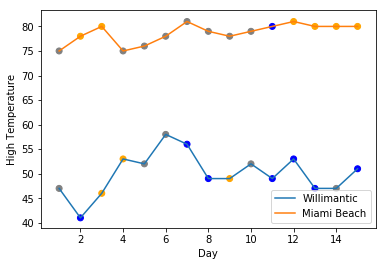

In [11]:
# get the data to plot
willi = getHighTemps("06226")
mb = getHighTemps("33109") 

# create plot
days = range(1,16)

# plot Willimantic data
plt.scatter(days, willi.highs, c = willi.colors)
plt.plot(days, willi.highs, label = "Willimantic")

# plot Miami Beach data
plt.scatter(days, mb.highs, c = mb.colors)
plt.plot(days, mb.highs, label = "Miami Beach")

# Add labels and show plot
plt.xlabel("Day")
plt.ylabel("High Temperature")
plt.legend()
plt.show()

In [ ]:
# Note: because the wordcloud package is not available online, running this code will generate an error
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# get Willimantic weather descriptions (the text only) and store as a single string
descriptions = table.find_all("td", {"class": "description"})
descriptions = [d.text for d in descriptions]
descriptions = " ".join(descriptions)

#generate the word cloud
wordcloud = WordCloud(
        background_color = 'black',
        stopwords = STOPWORDS.add('RT')
).generate(descriptions)

plt.imshow(wordcloud)
plt.show()
